In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

fm._rebuild()
fm.get_fontconfig_fonts()

# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumSquareRoundEB.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [23]:
subway=pd.read_csv('../csv-data/2020_seoul_subway.csv', encoding='euc-kr')
subway

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2286,2354,2261,1922,1696,1620,1181,768,426,77
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,873,1019,1234,1383,1271,1061,991,572,217,2
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,885,783,849,602,435,293,273,174,149,26
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1636,1748,1890,1879,1827,1955,1800,1259,406,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,2825,신흥,하차,31,95,78,211,145,...,341,341,381,428,292,229,219,85,42,0
202276,2020-12-31,8호선,2826,수진,승차,112,203,475,641,311,...,210,236,226,223,121,90,109,35,19,0
202277,2020-12-31,8호선,2826,수진,하차,15,70,92,227,190,...,296,309,300,372,296,232,202,127,45,0
202278,2020-12-31,8호선,2827,모란,승차,49,88,246,314,176,...,282,234,261,282,140,86,112,45,6,0


In [32]:
#하루 총합 승하차 인원 구하기
total = []
subway1=subway.copy()

subway1['합계'] = subway1.sum(axis=1)-subway1['역번호']
subway1

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합계
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2354,2261,1922,1696,1620,1181,768,426,77,30085
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,1019,1234,1383,1271,1061,991,572,217,2,12212
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,783,849,602,435,293,273,174,149,26,10608
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1748,1890,1879,1827,1955,1800,1259,406,6,20523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202275,2020-12-31,8호선,2825,신흥,하차,31,95,78,211,145,...,341,381,428,292,229,219,85,42,0,3920
202276,2020-12-31,8호선,2826,수진,승차,112,203,475,641,311,...,236,226,223,121,90,109,35,19,0,4053
202277,2020-12-31,8호선,2826,수진,하차,15,70,92,227,190,...,309,300,372,296,232,202,127,45,0,3754
202278,2020-12-31,8호선,2827,모란,승차,49,88,246,314,176,...,234,261,282,140,86,112,45,6,0,3223


In [75]:
#1호선 서울역에서 승차하는 사람들
timeline=['06:00 이전','06:00 ~ 07:00','07:00 ~ 08:00','08:00 ~ 09:00','09:00 ~ 10:00','10:00 ~ 11:00','11:00 ~ 12:00','12:00 ~ 13:00','13:00 ~ 14:00','14:00 ~ 15:00','15:00 ~ 16:00','16:00 ~ 17:00','17:00 ~ 18:00','18:00 ~ 19:00','19:00 ~ 20:00','20:00 ~ 21:00','21:00 ~ 22:00','22:00 ~ 23:00','23:00 ~ 24:00','24:00 이후']
seoul_station_ride=subway1[(subway1['역명']=="서울역")&(subway1['구분']=="승차")]
seoul_station_ride

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,합계
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,3194,3342,3002,2857,2311,2523,1830,987,25,36641
220,2020-01-01,4호선,426,서울역,승차,120,142,141,211,281,...,499,491,566,324,303,245,191,112,1,6226
550,2020-01-02,1호선,150,서울역,승차,351,492,1774,3508,2104,...,3715,5874,10382,4630,3206,3054,1962,1064,147,59718
770,2020-01-02,4호선,426,서울역,승차,179,260,495,756,548,...,788,1652,3467,1379,800,718,513,269,34,15479
1100,2020-01-03,1호선,150,서울역,승차,366,463,1445,2876,2138,...,4732,7182,11119,5584,3807,3632,2877,1370,166,66257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200836,2020-12-29,4호선,426,서울역,승차,132,176,374,478,306,...,386,958,1893,669,426,351,134,39,3,8133
201170,2020-12-30,1호선,150,서울역,승차,244,317,937,1604,1117,...,1979,3454,5505,2531,1663,1710,540,202,5,29473
201390,2020-12-30,4호선,426,서울역,승차,131,170,382,421,275,...,461,835,1834,674,373,373,153,40,0,7842
201726,2020-12-31,1호선,150,서울역,승차,232,269,777,1430,989,...,2792,3345,3984,2222,1421,1413,600,144,2,28539


[06:00 이전    227.398907
dtype: float64, 06:00 ~ 07:00    260.191257
dtype: float64, 07:00 ~ 08:00    686.898907
dtype: float64, 08:00 ~ 09:00    1136.301913
dtype: float64, 09:00 ~ 10:00    806.352459
dtype: float64, 10:00 ~ 11:00    743.621585
dtype: float64, 11:00 ~ 12:00    907.454918
dtype: float64, 12:00 ~ 13:00    1047.071038
dtype: float64, 13:00 ~ 14:00    1099.536885
dtype: float64, 14:00 ~ 15:00    970.385246
dtype: float64, 15:00 ~ 16:00    1262.222678
dtype: float64, 16:00 ~ 17:00    1397.912568
dtype: float64, 17:00 ~ 18:00    2462.867486
dtype: float64, 18:00 ~ 19:00    3923.857923
dtype: float64, 19:00 ~ 20:00    1810.73224
dtype: float64, 20:00 ~ 21:00    1199.663934
dtype: float64, 21:00 ~ 22:00    1145.039617
dtype: float64, 22:00 ~ 23:00    774.356557
dtype: float64, 23:00 ~ 24:00    302.551913
dtype: float64, 24:00 이후    15.815574
dtype: float64]


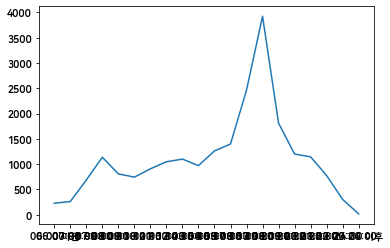

In [78]:

li=[]
for i in timeline:
    li.append(seoul_station_ride[[i]].sum()/seoul_station_ride.shape[0]) #6시 이전 승차 평균
print(li)
# filtered_df

plt.plot(timeline, li)

In [ ]:
#월별....
month=[]
jan_station=subway1.loc[subway1["날짜"].between('2020-01-01', '2020-01-31')]
month.append(jan_station['합계'].sum())
feb_station=subway1.loc[subway1["날짜"].between('2020-02-01', '2020-02-28')]
month.append(feb_station['합계'].sum())
mar_station=subway1.loc[subway1["날짜"].between('2020-03-01', '2020-03-31')]
month.append(mar_station['합계'].sum())
apr_station=subway1.loc[subway1["날짜"].between('2020-04-01', '2020-04-30')]
month.append(apr_station['합계'].sum())
may_station=subway1.loc[subway1["날짜"].between('2020-05-01', '2020-05-31')]
month.append(may_station['합계'].sum())
jun_station=subway1.loc[subway1["날짜"].between('2020-06-01', '2020-06-30')]
month.append(jun_station['합계'].sum())
jul_station=subway1.loc[subway1["날짜"].between('2020-07-01', '2020-07-31')]
month.append(jul_station['합계'].sum())
aug_station=subway1.loc[subway1["날짜"].between('2020-08-01', '2020-08-31')]
month.append(aug_station['합계'].sum())
sep_station=subway1.loc[subway1["날짜"].between('2020-09-01', '2020-09-30')]
month.append(sep_station['합계'].sum())
oct_station=subway1.loc[subway1["날짜"].between('2020-10-01', '2020-10-31')]
month.append(oct_station['합계'].sum())
nov_station=subway1.loc[subway1["날짜"].between('2020-11-01', '2020-11-30')]
month.append(nov_station['합계'].sum())
dec_station=subway1.loc[subway1["날짜"].between('2020-12-01', '2020-12-31')]
month.append(dec_station['합계'].sum())

print(month)
mon=['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월','12월']
plt.plot(mon, month, 'o')

[06:00 이전    227.398907
dtype: float64, 06:00 ~ 07:00    260.191257
dtype: float64, 07:00 ~ 08:00    686.898907
dtype: float64, 08:00 ~ 09:00    1136.301913
dtype: float64, 09:00 ~ 10:00    806.352459
dtype: float64, 10:00 ~ 11:00    743.621585
dtype: float64, 11:00 ~ 12:00    907.454918
dtype: float64, 12:00 ~ 13:00    1047.071038
dtype: float64, 13:00 ~ 14:00    1099.536885
dtype: float64, 14:00 ~ 15:00    970.385246
dtype: float64, 15:00 ~ 16:00    1262.222678
dtype: float64, 16:00 ~ 17:00    1397.912568
dtype: float64, 17:00 ~ 18:00    2462.867486
dtype: float64, 18:00 ~ 19:00    3923.857923
dtype: float64, 19:00 ~ 20:00    1810.73224
dtype: float64, 20:00 ~ 21:00    1199.663934
dtype: float64, 21:00 ~ 22:00    1145.039617
dtype: float64, 22:00 ~ 23:00    774.356557
dtype: float64, 23:00 ~ 24:00    302.551913
dtype: float64, 24:00 이후    15.815574
dtype: float64]


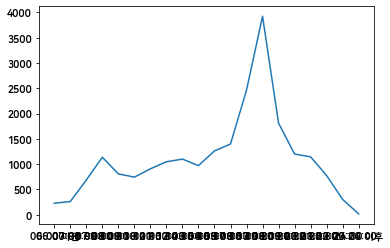

In [79]:


#1호선 서울역에서 승차하는 사람들
timeline=['06:00 이전','06:00 ~ 07:00','07:00 ~ 08:00','08:00 ~ 09:00','09:00 ~ 10:00','10:00 ~ 11:00','11:00 ~ 12:00','12:00 ~ 13:00','13:00 ~ 14:00','14:00 ~ 15:00','15:00 ~ 16:00','16:00 ~ 17:00','17:00 ~ 18:00','18:00 ~ 19:00','19:00 ~ 20:00','20:00 ~ 21:00','21:00 ~ 22:00','22:00 ~ 23:00','23:00 ~ 24:00','24:00 이후']
seoul_station_ride=subway1[(subway1['역명']=="서울역")&(subway1['구분']=="승차")]
seoul_station_ride

li=[]
for i in timeline:
    li.append(seoul_station_ride[[i]].sum()/seoul_station_ride.shape[0]) #6시 이전 승차 평균
print(li)
# filtered_df

plt.plot(timeline, li)